# 6.1 Критерии согласия хи-квадрат и Колмогорова

In [3]:
import scipy.stats as sps
import numpy as np

Исследователь Василий по выборке

0.29 0.01 0.50 0.21 0.65 0.34 0.75 0.07 0.07 0.25 1.26 0.11 0.22 0.95 0.63 0.93 0.73 0.37 0.80 1.10

проверяет гипотезу об экспоненциальном законе распределения с параметром λ=2λ2 генеральной совокупности. Найдите  вероятность попадания генеральной совокупности в интервал (0.2, 0.5]  при условии, что верна нулевая гипотеза

In [5]:
X = np.array([0.29, 0.01, 0.50, 0.21, 0.65, 0.34, 0.75, 0.07, 0.07, 0.25, 1.26, 0.11, 0.22, 0.95, 0.63, 0.93, 0.73, 0.37, 0.80, 1.10])

In [9]:
l = 2
np.exp(-l*0.2) - np.exp(-l*0.5)

0.302440604864197

Критерий согласия хи-квадрат

In [15]:
alpha = 0.01
sps.chi2.ppf(1 - alpha, 2)

9.21034037197618

In [42]:
n = len(X)
n1 = 0
n2 = 0
n3 = 0
for i in X:
    if i >= 0 and i <= 0.2:
        n1 += 1
    elif i > 0.2 and i <= 0.5:
        n2 += 1
    elif i > 0.5:
        n3 += 1
ni = np.array([n1, n2, n3])
ni

array([4, 7, 9])

In [48]:
p1 = np.exp(-l*0.0) - np.exp(-l*0.2)
p2 = np.exp(-l*0.2) - np.exp(-l*0.5)
p3 = np.exp(-l*0.5) - 0
pi = np.array([p1, p2, p3])
pi

array([0.32967995, 0.3024406 , 0.36787944])

In [50]:
f = lambda ni, pi: (ni - n*pi)**2/(n*pi)
par = sum((f(n1, p1), f(n2, p2), f(n3, p3)))
par


1.5364013495934465

In [53]:
chisq2 =n*((ni/n-pi)**2/(pi)).sum() 
chisq2

1.5364013495934463

Критерий согласия Колмогорова

In [66]:
a = np.array([451, 450, 444, 454, 447])
m, sigma = 450, 4
Dn1, _ = sps.kstest(a, lambda x: sps.norm.cdf(x, loc=m, scale=sigma))
Dn1*np.sqrt(5)
# sps.kstest(, (450, 4))

0.45010633921368626

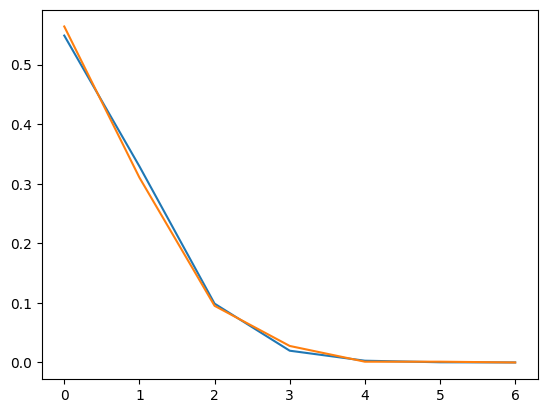

In [128]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

def poison(lmbd, k):
    return (lmbd**k/mt.factorial(k))*mt.exp(-lmbd)

X = np.array([427, 235, 72, 21, 1, 1, 0])

lambda_x = 0.6

K = range(len(X))

# Теоретическое распределение вероятностей Пуассона:
P = [poison(lambda_x , k) for k in K]

# Наблюдаемое распределение вероятностей 
p_h = X/X.sum()

# Графики 
plt.plot(K,P)
plt.plot(K,p_h)

Найдите ожидаемое число приборов, имевших  3 отказа за 10000 часов работы

In [127]:
sps.poisson.pmf(3, 0.6)*X.sum()

14.956214706834409

Найдите выборочное значение статистики критерия

In [140]:
n = X.sum()
n0 = 427
n1 = 235
n2 = 72
n3 = 23
p0 = sps.poisson.pmf(0, 0.6)
p1 = sps.poisson.pmf(1, 0.6)
p2 = sps.poisson.pmf(2, 0.6)
p3 = 1 - p0 - p1 - p2

In [143]:
par = sum((f(n0, p0), f(n1, p1), f(n2, p2), f(n3, p3)))
par

2.971279665208087

In [146]:
alpha = 0.01
k = 4
l = 1
sps.chi2.ppf(1-alpha, k-l-1, loc=0, scale=1)

9.21034037197618